In [69]:
#importing libraries 
import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Creating Dataset**

In [70]:


# Set the random seed for reproducibility
np.random.seed(42)

# Defining the number of samples in the dataset
num_samples = 5000

# Defining the maximum length of each sequence
max_seq_len = 50

# Generate the dataset
X = []
Y = []
for i in range(num_samples):
    # Generate a random sequence of variable length
    # seq_len = np.random.randint(1, max_seq_len+1)
    seq_len = 10
    x1 = np.random.rand(seq_len, 1) #all numbers between 0 and 1
   
    # Generate a random binary label
    x2 = np.random.randint(1, size=seq_len) #all zeroes
    
    indices = random.sample(range(seq_len), k=2) #choosing two random indices of the sequence whose 2nd dim will be replaced by 1
    x2[indices[0]] = 1
    x2[indices[1]] = 1

    x2=x2.reshape(seq_len,1)
    x = np.concatenate((x1, x2), axis=1) #array of shape: (seq_len,2)
    # print(x1.shape)
    # print(x2.shape)
    # print(x.shape)
    X.append(x)


for i in range(num_samples): #X.shape[0]
  sum = 0
  for j in range(X[i].shape[0]):
    if X[i][j][1] == 1:
      sum=sum+X[i][j][0]
  Y.append(sum)

# Convert the dataset to numpy arrays
X = np.array(X) #datapoints
Y = np.array(Y) #labels
Y = Y.reshape(5000,1)
  



In [71]:
print(X[0][5][0]) #1st dim of 6th sequence of 1st datapoint (out of 5000 datapoints)
print(X[0][5][1]) #2nd dim of 6th sequence of 1st datapoint (out of 5000 datapoints)

0.15599452033620265
0.0


In [72]:
print(X[0].shape)

(10, 2)


In [73]:
print(Y[4900])

[1.14940028]


In [74]:
print(X.shape) # 5000xnx2
print(Y.shape) #5000x1

(5000, 10, 2)
(5000, 1)


Dividing the dataset into a train set and a test set

In [75]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# print(X_test[500])
# print(y_test[500])

(4000, 10, 2)
(4000, 1)
(1000, 10, 2)
(1000, 1)


Sigmoid activation function

In [9]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# **Elmon Network**

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim

class ElmanNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ElmanNet, self).__init__()
        self.hidden_size = hidden_size
        
        # Initialize the weight matrices and bias vectors
        self.weight_ih = torch.randn(input_size, hidden_size)
        self.weight_hh = torch.randn(hidden_size, hidden_size)
        self.bias = torch.zeros(1, hidden_size)
        
        # Initialize the linear layer
        self.linear = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, inputs):
        batch_size, seq_length, input_size = inputs.shape
        inputs = inputs.transpose(0, 1)  # transpose to (seq_length, batch_size, input_size)
        
        # Initialize the hidden state
        self.hidden = torch.zeros(batch_size, self.hidden_size)

        # Loop through the sequence
        for i in range(seq_length):
            # Compute the hidden state
            self.hidden = torch.tanh(torch.mm(inputs[i], self.weight_ih) + torch.mm(self.hidden, self.weight_hh) + self.bias)

        # Compute the output
        output = self.linear(self.hidden)

        return output


In [78]:
# Initializing the Elman Network
input_size = 2 #as each input sequence has depth = 2
hidden_size = 128
output_size = 1 #as we are predicting a single binary output value at each time step.
model = ElmanNet(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

Training the Elman Network

In [79]:
train_data = torch.from_numpy(X_train).float()
train_labels = torch.from_numpy(y_train).float()

# Training loop
num_epochs = 100
batch_size = 128
elman_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_data), batch_size):
        # Get the current batch
        inputs = train_data[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        # print('outputs: ',outputs.shape)
        # print('labels: ', labels.shape)

        # Computing the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Elman Training Loss: {running_loss}")
    elman_losses.append(running_loss)

Epoch 1, Elman Training Loss: 18.289664685726166
Epoch 2, Elman Training Loss: 10.000224620103836
Epoch 3, Elman Training Loss: 8.340704053640366
Epoch 4, Elman Training Loss: 7.499967321753502
Epoch 5, Elman Training Loss: 6.89403510093689
Epoch 6, Elman Training Loss: 6.422660201787949
Epoch 7, Elman Training Loss: 6.057969897985458
Epoch 8, Elman Training Loss: 5.782413840293884
Epoch 9, Elman Training Loss: 5.580442652106285
Epoch 10, Elman Training Loss: 5.437134400010109
Epoch 11, Elman Training Loss: 5.338877782225609
Epoch 12, Elman Training Loss: 5.274006247520447
Epoch 13, Elman Training Loss: 5.23303547501564
Epoch 14, Elman Training Loss: 5.208604604005814
Epoch 15, Elman Training Loss: 5.1952332109212875
Epoch 16, Elman Training Loss: 5.188993394374847
Epoch 17, Elman Training Loss: 5.18717060983181
Epoch 18, Elman Training Loss: 5.187952667474747
Epoch 19, Elman Training Loss: 5.190170854330063
Epoch 20, Elman Training Loss: 5.193098857998848
Epoch 21, Elman Training Loss

Getting predictions as well as measuring performance of the Elman Network 

In [80]:
# Will use the updated Elman Network 

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test)
batch_size = 128

# Evaluating the model on test set (1000 datapoints)
with torch.no_grad():  #disabling gradient calculation (as inferencing)
    
    # Split the data into batches of size batch_size
    num_batches = len(X_test_tensor) // batch_size
    test_data_batches = torch.split(X_test_tensor[:num_batches*batch_size], batch_size)
    test_label_batches = torch.split(y_test_tensor[:num_batches*batch_size], batch_size)
    

    test_loss = 0.0
    num_batches = 0

    # Making predictions for each batch
    for test_data, test_labels in zip(test_data_batches, test_label_batches):
        
        # Pass the test data through the Elman Net model, updated by training 
        outputs = model(test_data)

        # Computing the MSE between predicted outputs and Ground truth labels
        loss = nn.MSELoss()(outputs, test_labels)
        
        # Accumulating the loss
        test_loss += loss.item()
        num_batches += 1


# Computing the average test loss over all batches
test_loss /= num_batches

print("Test Loss for Elman Network: {:.6f}".format(test_loss))
elman_mse = test_loss

Test Loss for Elman Network: 0.177413


# **LSTM**

In [81]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize the weight matrices
        self.weight_ih = nn.Parameter(torch.Tensor(input_size, 4 * hidden_size))
        self.weight_hh = nn.Parameter(torch.Tensor(hidden_size, 4 * hidden_size))
        self.bias = nn.Parameter(torch.Tensor(4 * hidden_size))

        # Initialize the output layer
        self.linear = nn.Linear(hidden_size, output_size)

        # Initialize the hidden state and cell state
        self.hidden = None
        self.cell_state = None

        # Initialize the weights and biases
        self.init_weights()

    def forward(self, inputs):
        # seq_length, batch_size, input_size = inputs.shape
        batch_size, seq_length, input_size = inputs.shape
        inputs = inputs.transpose(0, 1)  # transpose to (seq_length, batch_size, input_size)

        # print(inputs.shape)
        # print(inputs[0].shape)

        # Initialize the hidden state and cell state
        self.hidden = torch.zeros(batch_size, self.hidden_size)
        
        self.cell_state = torch.zeros(batch_size, self.hidden_size)
      

        # Loop through the sequence
        for i in range(seq_length):
            # Compute the input gate, forget gate, output gate, and candidate gate
            
            gates = torch.mm(inputs[i], self.weight_ih) + torch.mm(self.hidden, self.weight_hh) + self.bias
            
            input_gate, forget_gate, output_gate, candidate_gate = gates.chunk(4, 1)

            # Apply the sigmoid activation function
            input_gate = torch.sigmoid(input_gate)
            forget_gate = torch.sigmoid(forget_gate)
            output_gate = torch.sigmoid(output_gate)

            # Apply the tanh activation function
            candidate_gate = torch.tanh(candidate_gate)

            # Compute the new cell state and hidden state
            self.cell_state = forget_gate * self.cell_state + input_gate * candidate_gate
            self.hidden = output_gate * torch.tanh(self.cell_state)

        # Compute the output
        output = self.linear(self.hidden)

        return output

    def init_weights(self):
        # Initialize the weights with a normal distribution
        nn.init.normal_(self.weight_ih, 0.0, 0.02)
        nn.init.normal_(self.weight_hh, 0.0, 0.02)
        nn.init.normal_(self.bias, 0.0, 0.02)
        nn.init.normal_(self.linear.weight, 0.0, 0.02)
        nn.init.normal_(self.linear.bias, 0.0, 0.02)






In [82]:
# Initializing the LSTM network
input_size = 2
hidden_size = 128
output_size = 1
model = LSTM(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)





Training the LSTM

In [83]:
train_data = torch.from_numpy(X_train).float()
train_labels = torch.from_numpy(y_train).float()

# Training loop
num_epochs = 100
batch_size = 128
lstm_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_data), batch_size):
        # Get the current batch
        inputs = train_data[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        # print('outputs: ',outputs.shape)
        # print('labels: ', labels.shape)

        # Computing the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, LSTM Training Loss: {running_loss}")
    lstm_losses.append(running_loss)


Epoch 1, LSTM Training Loss: 18.73641885817051
Epoch 2, LSTM Training Loss: 5.34566105902195
Epoch 3, LSTM Training Loss: 5.057914853096008
Epoch 4, LSTM Training Loss: 5.0136245265603065
Epoch 5, LSTM Training Loss: 4.90203058719635
Epoch 6, LSTM Training Loss: 4.717830985784531
Epoch 7, LSTM Training Loss: 4.365478374063969
Epoch 8, LSTM Training Loss: 4.217089854180813
Epoch 9, LSTM Training Loss: 4.1334880366921425
Epoch 10, LSTM Training Loss: 4.026603251695633
Epoch 11, LSTM Training Loss: 3.7626515552401543
Epoch 12, LSTM Training Loss: 2.800171732902527
Epoch 13, LSTM Training Loss: 1.053887820802629
Epoch 14, LSTM Training Loss: 0.6188005786389112
Epoch 15, LSTM Training Loss: 0.42204575799405575
Epoch 16, LSTM Training Loss: 0.31988499453291297
Epoch 17, LSTM Training Loss: 0.2543841013684869
Epoch 18, LSTM Training Loss: 0.2162221116013825
Epoch 19, LSTM Training Loss: 0.17265726439654827
Epoch 20, LSTM Training Loss: 0.12480153236538172
Epoch 21, LSTM Training Loss: 0.10756

Getting predictions as well as measuring performance of the LSTM Model

In [84]:
# Will use the updated LSTM model 

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test)
batch_size = 128

# Evaluating the model on test set (1000 datapoints)
with torch.no_grad():  #disabling gradient calculation (as inferencing)
    
    # Split the data into batches of size batch_size
    num_batches = len(X_test_tensor) // batch_size
    test_data_batches = torch.split(X_test_tensor[:num_batches*batch_size], batch_size)
    test_label_batches = torch.split(y_test_tensor[:num_batches*batch_size], batch_size)
    

    test_loss = 0.0
    num_batches = 0

    # Making predictions for each batch
    for test_data, test_labels in zip(test_data_batches, test_label_batches):
        
        # Pass the test data through the LSTM model, updated by training 
        outputs = model(test_data)

        # Computing the MSE between predicted outputs and Ground truth labels
        loss = nn.MSELoss()(outputs, test_labels)
        
        # Accumulating the loss
        test_loss += loss.item()
        num_batches += 1


# Computing the average test loss over all batches
test_loss /= num_batches

print("Test Loss for LSTM: {:.6f}".format(test_loss))
lstm_mse = test_loss

Test Loss for LSTM: 0.000240


# **GRU**

In [85]:
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        
        # Initialize the weight matrices and biases
        self.weight_ir = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.weight_hr = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.bias_r = nn.Parameter(torch.Tensor(hidden_size))
        self.weight_iz = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.weight_hz = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.bias_z = nn.Parameter(torch.Tensor(hidden_size))
        self.weight_in = nn.Parameter(torch.Tensor(input_size, hidden_size))
        self.weight_hn = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.bias_n = nn.Parameter(torch.Tensor(hidden_size))
        self.linear = nn.Linear(hidden_size, output_size)
        
        # Initialize the parameters
        self.init_parameters()
        
    def init_parameters(self):
        # Initialize the weight matrices and biases
        nn.init.xavier_uniform_(self.weight_ir)
        nn.init.xavier_uniform_(self.weight_hr)
        nn.init.zeros_(self.bias_r)
        nn.init.xavier_uniform_(self.weight_iz)
        nn.init.xavier_uniform_(self.weight_hz)
        nn.init.zeros_(self.bias_z)
        nn.init.xavier_uniform_(self.weight_in)
        nn.init.xavier_uniform_(self.weight_hn)
        nn.init.zeros_(self.bias_n)
        
    def forward(self, inputs):
        batch_size, seq_length, input_size = inputs.shape
        inputs = inputs.transpose(0, 1)  # transpose to (seq_length, batch_size, input_size)
        # print(inputs.shape)
        
        # Initialize the hidden state
        hidden = torch.zeros(batch_size, self.hidden_size)
        
        # Loop through the sequence
        for i in range(seq_length):
            # Compute the reset gate
            reset_gate = torch.sigmoid(torch.mm(inputs[i], self.weight_ir) + torch.mm(hidden, self.weight_hr) + self.bias_r)
            
            # Compute the update gate
            update_gate = torch.sigmoid(torch.mm(inputs[i], self.weight_iz) + torch.mm(hidden, self.weight_hz) + self.bias_z)
            
            # Compute the new candidate activations
            candidate_activations = torch.tanh(torch.mm(inputs[i], self.weight_in) + reset_gate * torch.mm(hidden, self.weight_hn) + self.bias_n)
            
            # Compute the new hidden state
            hidden = (1 - update_gate) * hidden + update_gate * candidate_activations
        
        # Compute the output
        output = self.linear(hidden)
        
        return output


In [86]:
# Initializing the GRU network
input_size = 2
hidden_size = 128
output_size = 1
model = GRU(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

Training the GRU

In [87]:
train_data = torch.from_numpy(X_train).float()
train_labels = torch.from_numpy(y_train).float()

# Training loop
num_epochs = 100
batch_size = 128
gru_losses = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(train_data), batch_size):
        # Get the current batch
        inputs = train_data[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        # print('outputs: ',outputs.shape)
        # print('labels: ', labels.shape)

        # Computing the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, GRU Training Loss: {running_loss}")
    gru_losses.append(running_loss)

Epoch 1, GRU Training Loss: 8.389917127788067
Epoch 2, GRU Training Loss: 4.382082901895046
Epoch 3, GRU Training Loss: 3.71613273024559
Epoch 4, GRU Training Loss: 2.0018900707364082
Epoch 5, GRU Training Loss: 0.8639416396617889
Epoch 6, GRU Training Loss: 0.49671305157244205
Epoch 7, GRU Training Loss: 0.24093755893409252
Epoch 8, GRU Training Loss: 0.12714167800731957
Epoch 9, GRU Training Loss: 0.0831200018292293
Epoch 10, GRU Training Loss: 0.05940751079469919
Epoch 11, GRU Training Loss: 0.0448250753688626
Epoch 12, GRU Training Loss: 0.03241402131970972
Epoch 13, GRU Training Loss: 0.0211391870980151
Epoch 14, GRU Training Loss: 0.015219732566038147
Epoch 15, GRU Training Loss: 0.012099404659238644
Epoch 16, GRU Training Loss: 0.010680001345463097
Epoch 17, GRU Training Loss: 0.008155876654200256
Epoch 18, GRU Training Loss: 0.007957476715091616
Epoch 19, GRU Training Loss: 0.007077291505993344
Epoch 20, GRU Training Loss: 0.005408468765381258
Epoch 21, GRU Training Loss: 0.005

Getting predictions as well as measuring performance of the GRU Model

In [88]:
# Will use the updated GRU model 

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test)
batch_size = 128

# Evaluating the model on test set (1000 datapoints)
with torch.no_grad():  #disabling gradient calculation (as inferencing)
    
    # Split the data into batches of size batch_size
    num_batches = len(X_test_tensor) // batch_size
    test_data_batches = torch.split(X_test_tensor[:num_batches*batch_size], batch_size)
    test_label_batches = torch.split(y_test_tensor[:num_batches*batch_size], batch_size)
    

    test_loss = 0.0
    num_batches = 0

    # Making predictions for each batch
    for test_data, test_labels in zip(test_data_batches, test_label_batches):
        
        # Pass the test data through the GRU model, updated by training 
        outputs = model(test_data)

        # Computing the MSE between predicted outputs and Ground truth labels
        loss = nn.MSELoss()(outputs, test_labels)
        
        # Accumulating the loss
        test_loss += loss.item()
        num_batches += 1


# Computing the average test loss over all batches
test_loss /= num_batches

print("Test Loss for GRU: {:.6f}".format(test_loss))
gru_mse = test_loss

Test Loss for GRU: 0.000037


# **Baseline**

In [89]:
# Baseline that always predicts the sum as 1
def Baseline(X_test_tensor):
  batch_size = test_data.shape[0]
  output = torch.ones(batch_size,1)
  return output




Getting predictions as well as measuring performance of the Baseline

In [90]:


X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test)
batch_size = 128

# Evaluating the Baseline on test set (1000 datapoints)
with torch.no_grad():  #disabling gradient calculation (as inferencing)
    
    # Split the data into batches of size batch_size
    num_batches = len(X_test_tensor) // batch_size
    test_data_batches = torch.split(X_test_tensor[:num_batches*batch_size], batch_size)
    test_label_batches = torch.split(y_test_tensor[:num_batches*batch_size], batch_size)
    

    test_loss = 0.0
    num_batches = 0

    # Making predictions for each batch
    for test_data, test_labels in zip(test_data_batches, test_label_batches):
        
        # Pass the test data through the baseline
        outputs = Baseline(test_data)

        # Computing the MSE between predicted outputs and Ground truth labels
        loss = nn.MSELoss()(outputs, test_labels)
        
        # Accumulating the loss
        test_loss += loss.item()
        num_batches += 1


# Computing the average test loss over all batches
test_loss /= num_batches

print("Test Loss for Baseline: {:.6f}".format(test_loss))
base_mse = test_loss

Test Loss for Baseline: 0.173563


# **Comparing the performance of all the models by plotting their learning curves and final performance** 

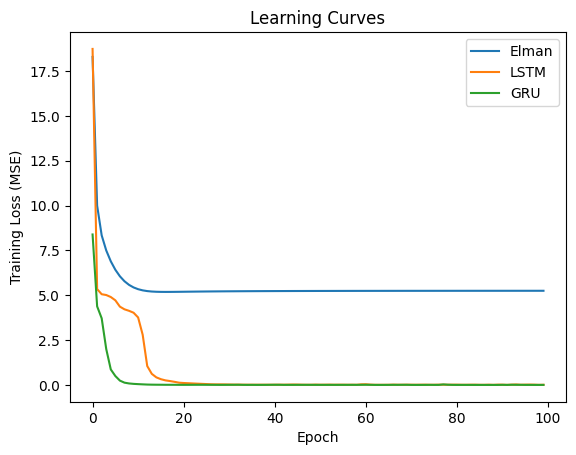

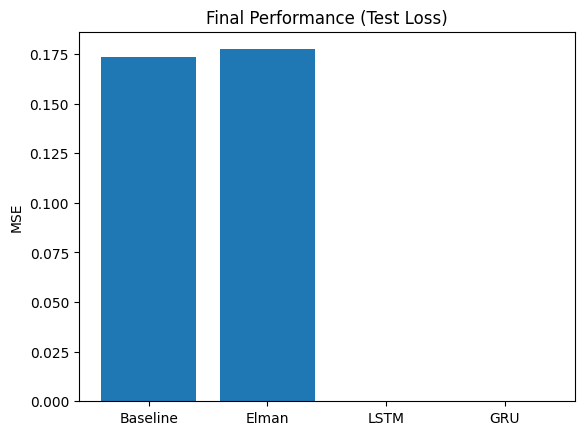

In [91]:

# Plotting learning curves (As Baseline model do not need learning, its curve is not present here)
plt.plot(elman_losses, label='Elman')
plt.plot(lstm_losses, label='LSTM')
plt.plot(gru_losses, label='GRU')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Learning Curves')
plt.show()

# Plotting final performance
plt.bar(['Baseline', 'Elman', 'LSTM', 'GRU'], [base_mse, elman_mse, lstm_mse, gru_mse])
plt.ylabel('MSE')
plt.title('Final Performance (Test Loss)')
plt.show()
